# 

## Importing Python Libraries for Machine Learning

In [1]:
#importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Importing of Churning Dataset Excel Document

In [2]:
# importing the dataset

dataset = pd.read_csv("Predictive Analytics for Decision Making/Project/Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Explatory analysis of Churning Dataset. 
### 1) Printing of first 10 rows and shape of dataset
### 2) Printing of statistics metrics of dataset

In [3]:
# Exploratory Data Analysis

#printing the first 10 rows of the dataset
dataset.head(10)

#printing the shape of the dataset
print(dataset.shape)

# statistics metrics for the features

print(dataset.describe())

(10000, 14)
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0

## Analysis of dataset by reviewing any missing values

In [4]:
# check for missing values:

print("Missing values in the dataset: \n\n", dataset.isna().sum())

Missing values in the dataset: 

 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## The removal of non-essential features from the Churning Dataset.
### The team dropped the features of:
#### 1) Row Number 2) CustomerID 3) Surname

In [5]:
# removing non-essential features from the dataset

new_dataset = dataset.drop(columns = ["RowNumber","CustomerId", "Surname"])
new_dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Visual analysis of variables in dataset
### The team reviewed the exited individuals for Geography, Gender, Tenure, NumofProducts, HasCrCard, and IsActiveMember using 1=Exited, 0=Did not exit

### Conclusion: 

#### 1) Geography - Germany and France had the most exited individuals
#### 2) Gender - More females exited than men
#### 3) Tenure - The longer individuals were with the company, the less likely they were to exit
#### 4) NumofProducts - The more products an individual has, the less likely they were to exit
#### 5) HasCrCard - If an individual has 1 credit card, they exited more
#### 6) IsActiveMember - If the individual is an active member, they exited the company more

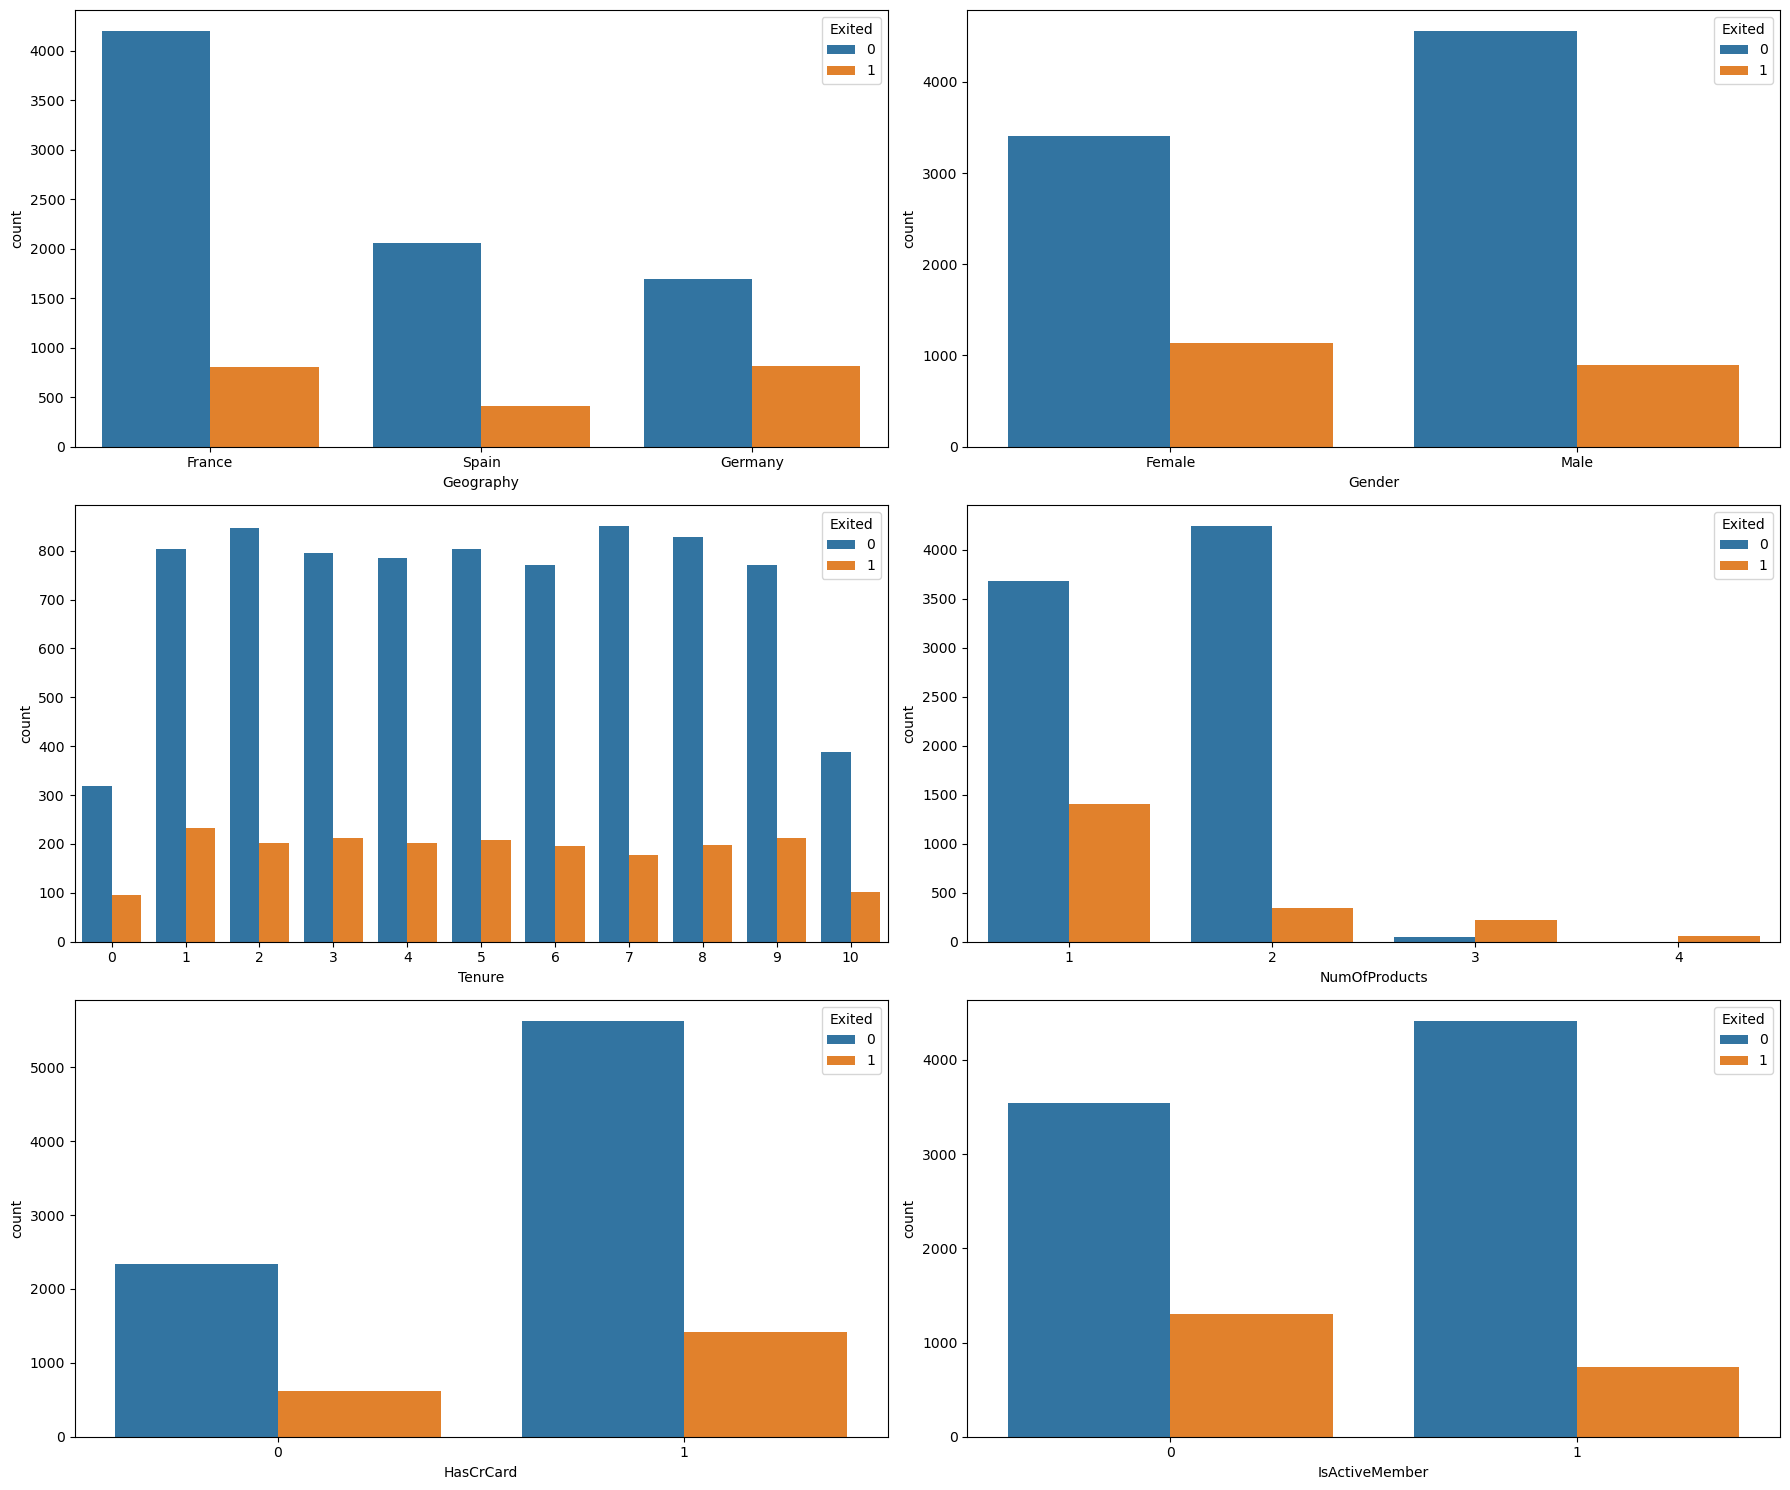

In [6]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot(x= 'Geography', hue = 'Exited', data = new_dataset, ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = new_dataset, ax = ax[0][1])
sns.countplot(x='Tenure', hue = 'Exited', data = new_dataset, ax = ax[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = new_dataset, ax = ax[1][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = new_dataset, ax = ax[2][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = new_dataset, ax = ax[2][1])

plt.tight_layout()
plt.show()

## Correlation analytical review

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

<AxesSubplot:>

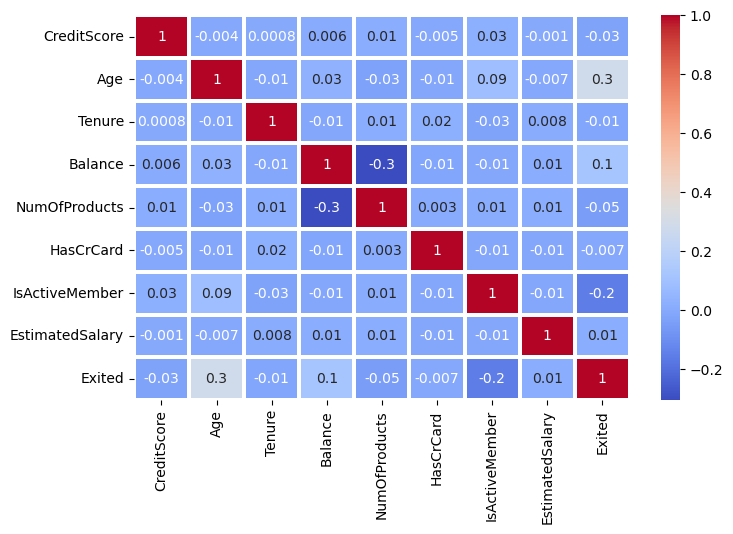

In [7]:
#correlation chart

corr = new_dataset.corr()
print(corr)

# plotting the graph of Correlation
plt.figure(figsize=(8,5))
sns.heatmap(new_dataset.corr(),cmap='coolwarm',annot=True,fmt='0.1g',linewidth=1.5,linecolor='white',cbar=True)

## Pie chart of exiting individuals

### Individuals did not exit the company 79.63% of the time while individuals did exit the company 20.37%.

0    7963
1    2037
Name: Exited, dtype: int64


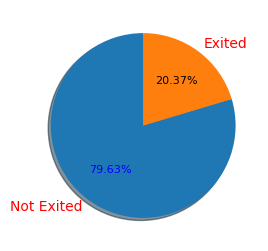

In [8]:
#plotting the datasets

values = new_dataset.Exited.value_counts()
print(values)

labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'red')
plt.setp(autotexts, size = 8, color = 'blue')
autotexts[1].set_color('black')
plt.show()

## Converting categorical variables into binary features

In [9]:
# separating the categorical variable and transforming them into numerical data using one-hot encoding technique
df_encoded = new_dataset[["Geography", "Gender"]]

new_data = new_dataset.drop(columns = ["Geography", "Gender"])

df_encoded1 = pd.get_dummies(df_encoded, columns =['Geography' , "Gender"], prefix = ['Geog', 'Gender'])

new_dataset = pd.concat([new_data, df_encoded1], axis = 1)

## Separting the independent and dependent variables from the dataset

In [10]:
# separating the independent and dependent variables from the dataset

X = new_dataset.drop('Exited', axis =1)
y = new_dataset['Exited']

## Reviewing the count of exited individuals (2,037) and individuals who did not exit (7,963)

In [11]:
# checking the proportion of our target variable in the dataset

y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Finding a right skewness distribution of 1.47

In [12]:
#Here, we are trying to figure out if our target variable has skewed distribution or not. A skewness value greater than 0 
#implies right skewness and value less than 0 indicates left-skewness.

skewness = skew(new_dataset["Exited"])
print(f"Skewness: {skewness}")

Skewness: 1.4713899141398699


## Standardizing the dataset that has a right skewness of 1.47

In [13]:
#Since our target variable is right skewed, we have to standardize our dataset so that they have a properties of a standard
#normal distribution with a mean of 0 and a standard deviation of 1.


# Assume X is your feature matrix, and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Applying standard scaling to the training and testing data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the data using a Logistic Regression Model

In [14]:
# Using the scaled data in your machine learning model

#Logistic Regression

#training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
log_predict = model.predict(X_test_scaled)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, log_predict)
print("Accuracy of Logistic Regression model:", logistic_accuracy)

print("Classification Report:\n")

report_dict_log = classification_report(y_test, log_predict, output_dict = True)
report_df_log = pd.DataFrame(report_dict_log)
display(report_df_log)


Accuracy of Logistic Regression model: 0.811
Classification Report:



,0,1,accuracy,macro avg,weighted avg
precision,0.830910,0.552448,0.811,0.691679,0.776192
recall,0.960174,0.201018,0.811,0.580596,0.811000
f1-score,0.890878,0.294776,0.811,0.592827,0.773744
support,1607.000000,393.000000,0.811,2000.000000,2000.000000


## Training the dataset using a Support Vector Machine (SVM) Model

In [15]:
#Support Vector Machines

#training the SVM model

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

#making prediction on the scaled test dataset

svm_predict = svm.predict(X_test_scaled)

#Evaluating SVM model

svm_accuracy = accuracy_score(y_test, svm_predict)
print("Accuracy of the SVM model: ",svm_accuracy)

print("Classification Report:\n")
report_dict_svm = classification_report(y_test, svm_predict, output_dict = True)
report_df_svm = pd.DataFrame(report_dict_svm)
display(report_df_svm)

Accuracy of the SVM model:  0.8035
Classification Report:



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.803500,0.0,0.8035,0.401750,0.645612
recall,1.000000,0.0,0.8035,0.500000,0.803500
f1-score,0.891045,0.0,0.8035,0.445523,0.715955
support,1607.000000,393.0,0.8035,2000.000000,2000.000000


## Training the dataset using K-Nearest Neighbor (KNN) Model

In [16]:
#K-nearest Neighbor with different values of n_neighbors

n_neighbors_values = [1,2,5,10,15,25,50]
max_accuracy = 0
best_n_neighbors = 0

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors =n_neighbors)
    
    knn.fit(X_train_scaled, y_train)
    knn_predict = knn.predict(X_test_scaled)
    
    knn_accuracy = accuracy_score(y_test, knn_predict)
    
    print("Accuracy of the KNN model for n_neighbor value of ", n_neighbors ,"is: " , round(knn_accuracy, 4))
    
    if knn_accuracy > max_accuracy:
        max_accuracy = knn_accuracy
        best_n_neighbors = n_neighbors


print(f"\nBest Accuracy: {max_accuracy:.2f} achieved with n_neighbors = {best_n_neighbors}") 

print("Classification Report:\n")

report_dict_knn = classification_report(y_test,knn_predict, output_dict = True)
report_df_knn = pd.DataFrame(report_dict_knn)
display(report_df_knn)

Accuracy of the KNN model for n_neighbor value of  1 is:  0.802
Accuracy of the KNN model for n_neighbor value of  2 is:  0.8375
Accuracy of the KNN model for n_neighbor value of  5 is:  0.829
Accuracy of the KNN model for n_neighbor value of  10 is:  0.835
Accuracy of the KNN model for n_neighbor value of  15 is:  0.8385
Accuracy of the KNN model for n_neighbor value of  25 is:  0.8365
Accuracy of the KNN model for n_neighbor value of  50 is:  0.8285

Best Accuracy: 0.84 achieved with n_neighbors = 15
Classification Report:



,0,1,accuracy,macro avg,weighted avg
precision,0.830890,0.777778,0.8285,0.804334,0.820453
recall,0.987554,0.178117,0.8285,0.582836,0.828500
f1-score,0.902474,0.289855,0.8285,0.596164,0.782094
support,1607.000000,393.000000,0.8285,2000.000000,2000.000000


## Review of Accuracy of Logistic Regression, SVM, and KNN Models

In [17]:
# compiling the accuracy scores into a dataframe.
final_data= pd.DataFrame({'Models': ['LOG','SVM','KNN'],
                         'Accuracy': [accuracy_score(y_test,log_predict)*100,
                                accuracy_score(y_test,svm_predict)*100,
                                (max_accuracy)*100] })               
                         
                        
final_data

,Models,Accuracy
0,LOG,81.10
1,SVM,80.35
2,KNN,83.85


## ROC Values for 3 Models

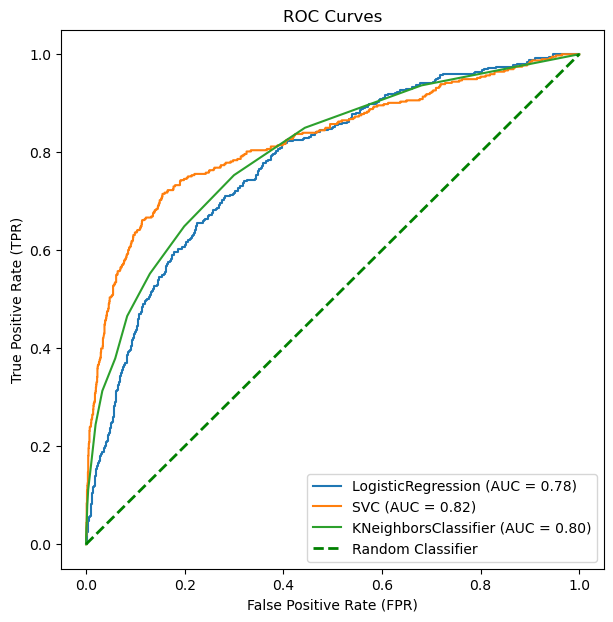

In [18]:
#Here we will find the ROC values for our 3 different models
# Training multiple models
models = [
    LogisticRegression(),
    SVC(probability = True),
    KNeighborsClassifier(n_neighbors= 15)
]

# Plot ROC curves for each model
plt.figure(figsize=(7,7))
for model in models:
    model.fit(X_train_scaled, y_train)
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random Classifier')

# Set plot details
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend()
plt.show()

## Conclusion:

### We were given the dateset to evaluate the churn rate for our customers. We used three different models: Logistic Regression, Support Vector Machines and KNN to evaluate the predictive performance. The above result indicate that SVM is the best model for estimating the likelihood of customer churn rate. Although, the accuracy of KNN model was higher to other models, we tried to find more True Positives for our dataset and minimize False Positive Rates. We are trying to find out the exact number of cutomers leaving the company, thus need correct predictions for both classes. Therefore, our evaluation of our model was based on the fact that higher true positives were needed. In conclusion, ROC curve was the best option in the above case and SVM was the best model for prediction.